In [1]:
import numpy as np
import re
import os
import glob
from astropy.time import Time
from astropy.coordinates import Angle
from astropy import units
import spec_calcs
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
directory = './h2c/'
h2c_files = glob.glob(os.path.join(directory,'acc_*.dat'))
n_files = len(h2c_files)

In [3]:
n_ants = np.zeros(n_files, dtype=int)
n_baselines = np.zeros(n_files, dtype=int)
max_ew = np.zeros(n_files)
mean_ew = np.zeros(n_files)
max_ns = np.zeros(n_files)
mean_ns = np.zeros(n_files)
max_len = np.zeros(n_files)
mean_len = np.zeros(n_files)
pos_dict = {}
uvw_dict = {}
dates = []

In [4]:
for f_ind, filename in enumerate(h2c_files):
    date_str = re.findall(r'\d+', os.path.basename(filename))[0]
    dates.append(Time('20' + date_str[0:2] + '-' + date_str[2:4] + '-' + date_str[4:6] + 'T00:00:00', scale='utc'))
    ant_names = np.loadtxt(filename, usecols=(0,), dtype=str)
    ant_nums = [int(re.findall(r'\d+', name)[0]) for name in ant_names]
    data = np.loadtxt(filename, usecols=(1,2,3))
    eastings = data[:, 0]
    northings = data[:, 1]
    altitudes = data[:, 2]
    pos_dict[f_ind] = np.array([eastings,northings,altitudes]).T
    n_ants[f_ind] = ant_names.shape[0]
    n_baselines[f_ind] = int(n_ants[f_ind] * (n_ants[f_ind]-1) / 2)

    uvw_array = np.zeros((n_baselines[f_ind], 3), dtype = float)
    ant1_array = np.zeros(n_baselines[f_ind], dtype = int)
    ant2_array = np.zeros(n_baselines[f_ind], dtype = int)
    bl_ind = 0
    for ind1, ant1 in enumerate(ant_nums):
        for ind2, ant2 in enumerate(ant_nums):
            if ant1 < ant2:
                ant1_array[bl_ind] = ant1
                ant2_array[bl_ind] = ant2
                uvw_array[bl_ind, :] = [eastings[ind1] - eastings[ind2], northings[ind1] - northings[ind2],
                                        altitudes[ind1] - altitudes[ind2]]
                bl_ind += 1
    uvw_dict[f_ind] = uvw_array
    max_ew[f_ind] = np.max(abs(uvw_array[:,0]))
    mean_ew[f_ind] = np.mean(abs(uvw_array[:,0]))
    max_ns[f_ind] = np.max(abs(uvw_array[:,1]))
    mean_ns[f_ind] = np.mean(abs(uvw_array[:,1]))
    max_len[f_ind] = np.max(np.linalg.norm(uvw_array, axis=1))
    mean_len[f_ind] = np.mean(np.linalg.norm(uvw_array, axis=1))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


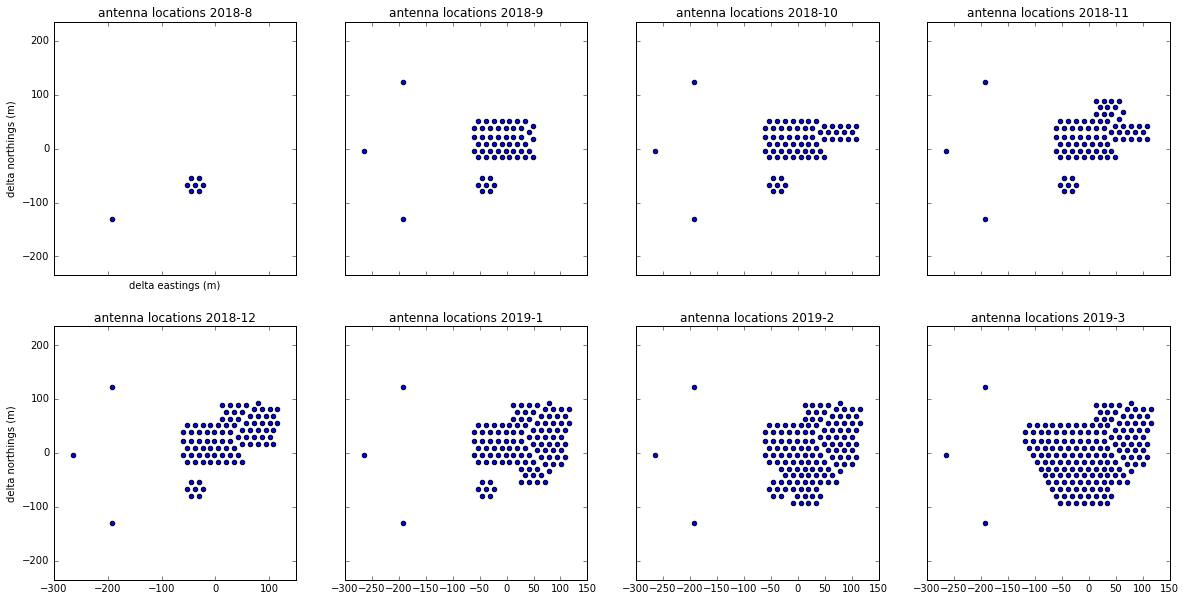

In [5]:
n_col = 4
n_row = int(np.ceil(n_files / float(n_col)))
matplotlib.rcParams['figure.figsize'] = (5*n_col,5*n_row)

array_center = np.mean(pos_dict[n_files-1], axis=0)
plot_ew = np.array([-1,1]) * np.ceil(np.max(abs(pos_dict[n_files-1][:,0] - array_center[0]), axis=0)/20)*20
plot_ns = np.array([-1,1]) * np.ceil(np.max(abs(pos_dict[n_files-1][:,1] - array_center[1]), axis=0)/20)*20

plt.figure(1)
fig, axes = plt.subplots(n_row, n_col, sharex='col', sharey='row')
for ind in range(n_files):
    row_num = ind % n_col
    col_num = ind / n_col
    positions = pos_dict[ind]
 
    axes[col_num, row_num].scatter(positions[:, 0] - array_center[0], positions[:, 1] - array_center[1])
    if row_num == 0:
        axes[col_num, row_num].set_ylabel("delta northings (m)")
    if col_num == 0:
        axes[col_num, row_num].set_xlabel("delta eastings (m)")
    axes[col_num, row_num].set_aspect('equal', 'datalim')
    axes[col_num, row_num].set_title('antenna locations {yr}-{mo}'.format(yr=dates[ind].datetime.year, mo=dates[ind].datetime.month))

plt.show()
plt.close()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


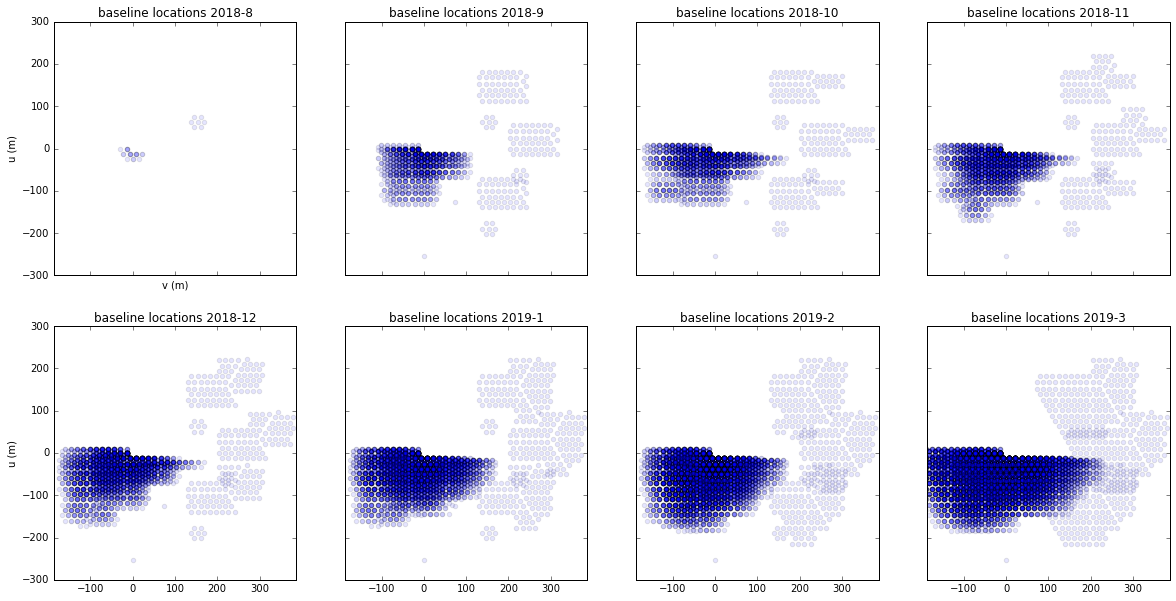

In [6]:
plot_ew = np.array([-1,1]) * np.ceil(np.max(abs(uvw_dict[n_files-1][:,0]), axis=0)/20)*20
plot_ns = np.array([-1,1]) * np.ceil(np.max(abs(uvw_dict[n_files-1][:,1]), axis=0)/20)*20

plt.figure(1)
fig, axes = plt.subplots(n_row, n_col, sharex='col', sharey='row')
for ind in range(n_files):
    row_num = ind % n_col
    col_num = ind / n_col
    uvw_array = uvw_dict[ind]
 
    axes[col_num, row_num].scatter(uvw_array[:, 0], uvw_array[:, 1], alpha=0.1)
    if row_num == 0:
        axes[col_num, row_num].set_ylabel("u (m)")
    if col_num == 0:
        axes[col_num, row_num].set_xlabel("v (m)")
    axes[col_num, row_num].set_aspect('equal', 'datalim')
    axes[col_num, row_num].set_title('baseline locations {yr}-{mo}'.format(yr=dates[ind].datetime.year,
                                                                           mo=dates[ind].datetime.month))

plt.show()
plt.close()

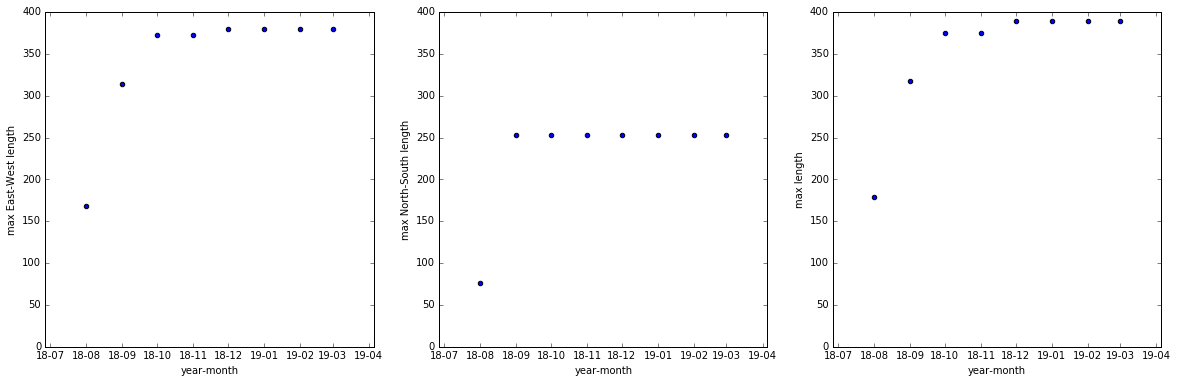

In [7]:
matplotlib.rcParams['figure.figsize'] = (20,6)
plot_dates = [date.datetime for date in dates]
month_format = mdates.DateFormatter('%y-%m')

plt.figure(1)
fig, axes = plt.subplots(1, 3)
axes[0].scatter(plot_dates, max_ew)
axes[0].set_xlabel("year-month")
axes[0].set_ylabel("max East-West length")
axes[0].set_ylim((0, 400))
axes[0].xaxis.set_major_formatter(month_format)

axes[1].scatter(plot_dates, max_ns)
axes[1].set_xlabel("year-month")
axes[1].set_ylabel("max North-South length")
axes[1].set_ylim((0, 400))
axes[1].xaxis.set_major_formatter(month_format)

axes[2].scatter(plot_dates, max_len)
axes[2].set_xlabel("year-month")
axes[2].set_ylabel("max length")
axes[2].set_ylim((0, 400))
axes[2].xaxis.set_major_formatter(month_format)

plt.show()
plt.close()

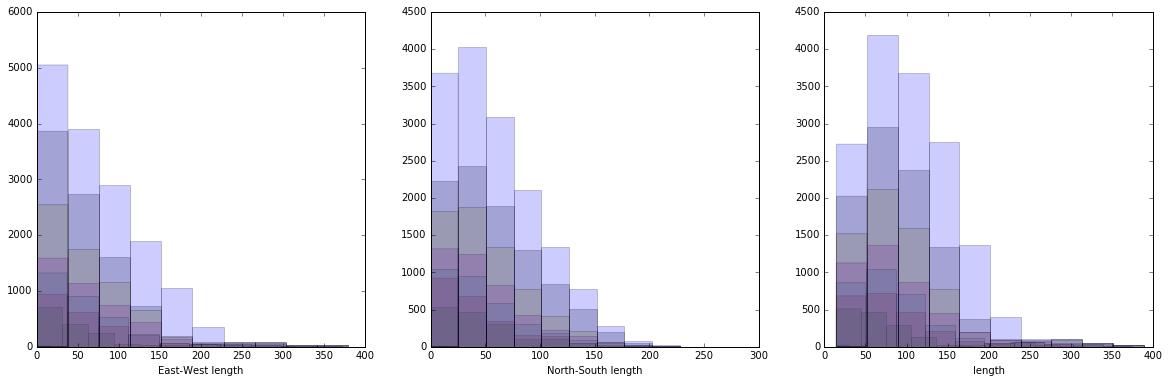

In [8]:
plt.figure(1)
plt.subplot(1, 3, 1)
for ind in range(n_files):
    uvw_array = uvw_dict[ind]
    plt.hist(abs(uvw_array[:,0]), alpha=0.2)
plt.xlabel("East-West length")

plt.subplot(1, 3, 2)
for ind in range(n_files):
    uvw_array = uvw_dict[ind]
    plt.hist(abs(uvw_array[:,1]), alpha=0.2)
plt.xlabel("North-South length")

plt.subplot(1, 3, 3)
for ind in range(n_files):
    uvw_array = uvw_dict[ind]
    plt.hist(np.linalg.norm(uvw_array, axis=1), alpha=0.2)
plt.xlabel("length")

plt.show()
plt.close()

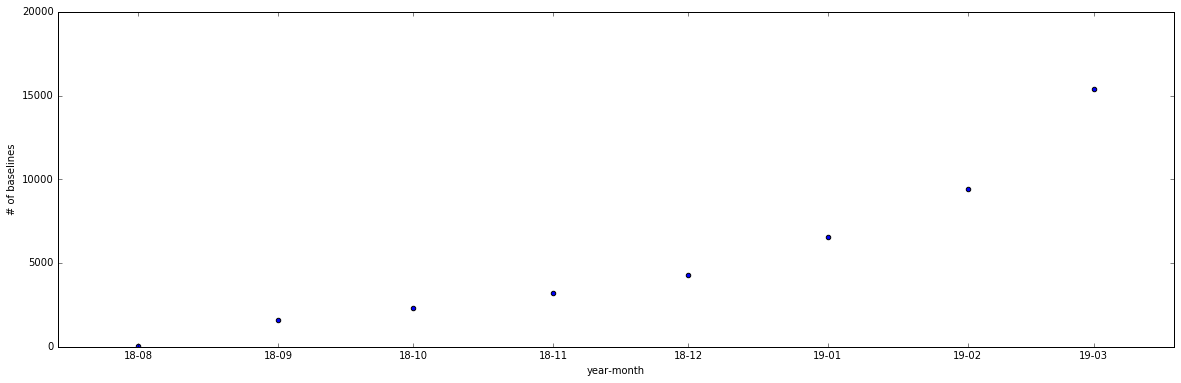

In [9]:
fig, axis = plt.subplots()
axis.scatter(plot_dates, n_baselines)
axis.set_xlabel("year-month")
axis.set_ylabel("# of baselines")
axis.set_ylim(ymin=0)
axis.xaxis.set_major_formatter(month_format)

In [10]:
max_baseline_m = [(bl * units.m) for bl in max_ew]
max_baseline_m = units.Quantity(max_baseline_m, units.m)  
params = spec_calcs.averaging_params(max_decorr=0.1, baseline=max_baseline_m,
                                     corr_FoV=Angle(90., units.degree), verbose=True)

Max resolution:
['24.5532arcmin' '13.133arcmin' '11.0729arcmin' '11.0729arcmin'
 '10.86arcmin' '10.86arcmin' '10.86arcmin' '10.86arcmin']
Max integration time required to keep the decorrelation due to time integrating under max_decorr on
the longest baselines:
[ 9.79445173  5.23886099  4.41707577  4.41707577  4.33213172  4.33213172
  4.33213172  4.33213172] s
Max channel width to keep the decorrelation due to channel width under max_decorr for a 90.0 degree
correlator FoV on the longest baselines:
[ 178.55417391   95.50572093   80.52443137   80.52443137   78.97588462
   78.97588462   78.97588462   78.97588462] kHz
Max integration time to keep the decorrelation due to time integrating after fringe stopping under
max_decorr for a 90.0 degree correlator FoV on the longest baselines:
[ 19.17225379  10.2548642    8.64625197   8.64625197   8.47997734
   8.47997734   8.47997734   8.47997734] s


In [11]:
max_baseline_m = [(bl * units.m) for bl in max_ew]
max_baseline_m = units.Quantity(max_baseline_m, units.m)  
params = spec_calcs.averaging_params(max_decorr=0.1, baseline=max_baseline_m,
                                     corr_FoV=Angle(10., units.degree), verbose=True)

Max resolution:
['24.5532arcmin' '13.133arcmin' '11.0729arcmin' '11.0729arcmin'
 '10.86arcmin' '10.86arcmin' '10.86arcmin' '10.86arcmin']
Max integration time required to keep the decorrelation due to time integrating under max_decorr on
the longest baselines:
[ 9.79445173  5.23886099  4.41707577  4.41707577  4.33213172  4.33213172
  4.33213172  4.33213172] s
Max channel width to keep the decorrelation due to channel width under max_decorr for a 10.0 degree
correlator FoV on the longest baselines:
[ 1028.25250637   549.99552666   463.72171856   463.72171856   454.8039932
   454.8039932    454.8039932    454.8039932 ] kHz
Max integration time to keep the decorrelation due to time integrating after fringe stopping under
max_decorr for a 10.0 degree correlator FoV on the longest baselines:
[ 110.40860921   59.05540928   49.79178065   49.79178065   48.83424319
   48.83424319   48.83424319   48.83424319] s


First do calculation with fringe stopping.

In [12]:
# This is the max number of channels that Jack can do 'easily'
n_channels = 4096
corr_chan_width = (250 * units.MHz) / n_channels
# Since we will integrate longer after fringe stopping, there's no need to integrate more here
corr_integration_time = .1 * units.s
# after fringe stopping, we can sum in time to longer integrations
corr_post_fringe_stop_int_time = 10 * units.s

channels_to_keep = n_channels * 3/4
obs_hrs_per_day=(12 * units.hour / units.day)
days_per_month=(30 * units.day)

In [13]:
proposed_decorrelations_90 = spec_calcs.decorrelations(baseline=max_baseline_m,
                                              corr_FoV=Angle(90., units.degree),
                                              n_channels=n_channels, chan_width=corr_chan_width,
                                              integration_time=corr_integration_time,
                                              fringe_stop_int_time=corr_post_fringe_stop_int_time,
                                              verbose=True)

Decorrelation fraction due to integration time on the longest baseline
[ 0.00102099  0.00190881  0.00226394  0.00226394  0.00230833  0.00230833
  0.00230833  0.00230833]
Longest E-W baseline with less than 10.0% decorrelation due to integration time
16444.74466458891 m
Decorrelation due to channel width for a 90.0 degree correlator FoV for the longest baseline
[ 0.03418299  0.06390733  0.07579707  0.07579707  0.07728328  0.07728328
  0.07728328  0.07728328]
Longest baseline for a 90.0 degree correlator FoV with less than 10.0% decorrelation due to channel
width
491.17996318720003 m
Correlator FoV with less than 10.0% decorrelation due to channel width for the longest baseline
['90d00m00s' '90d00m00s' '90d00m00s' '90d00m00s' '90d00m00s' '90d00m00s'
 '90d00m00s' '90d00m00s']
Decorrelation due to time integrating after fringe stopping for a 90.0 degree correlator FoV for the
longest baseline
[ 0.05215871  0.0975147   0.11565705  0.11565705  0.11792484  0.11792484
  0.11792484  0.11792484]

In [14]:
proposed_decorrelations_10 = spec_calcs.decorrelations(baseline=max_baseline_m,
                                              corr_FoV=Angle(10., units.degree),
                                              n_channels=n_channels, chan_width=corr_chan_width,
                                              integration_time=corr_integration_time,
                                              fringe_stop_int_time=corr_post_fringe_stop_int_time,
                                              verbose=True)

Decorrelation fraction due to integration time on the longest baseline
[ 0.00102099  0.00190881  0.00226394  0.00226394  0.00230833  0.00230833
  0.00230833  0.00230833]
Longest E-W baseline with less than 10.0% decorrelation due to integration time
16444.74466458891 m
Decorrelation due to channel width for a 10.0 degree correlator FoV for the longest baseline
[ 0.00593581  0.01109739  0.01316202  0.01316202  0.0134201   0.0134201
  0.0134201   0.0134201 ]
Longest baseline for a 10.0 degree correlator FoV with less than 10.0% decorrelation due to channel
width
2828.5926739140245 m
Correlator FoV with less than 10.0% decorrelation due to channel width for the longest baseline
['90d00m00s' '90d00m00s' '90d00m00s' '90d00m00s' '90d00m00s' '90d00m00s'
 '90d00m00s' '90d00m00s']
Decorrelation due to time integrating after fringe stopping for a 10.0 degree correlator FoV for the
longest baseline
[ 0.00905726  0.01693325  0.02008364  0.02008364  0.02047743  0.02047743
  0.02047743  0.02047743]


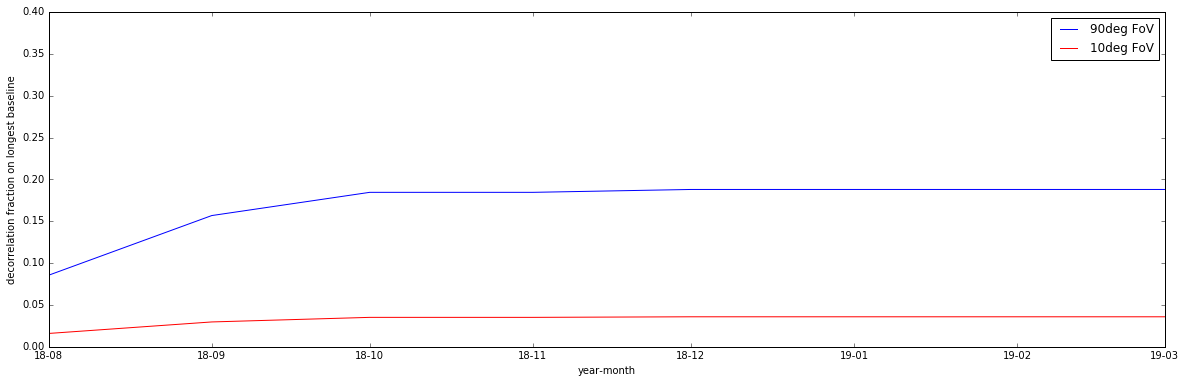

In [15]:
proposed_total_decorr_90 = proposed_decorrelations_90['post_fs_total_decorr']
proposed_total_decorr_10 = proposed_decorrelations_10['post_fs_total_decorr']

fig, axis = plt.subplots()
axis.plot(plot_dates, proposed_total_decorr_90, label='90deg FoV')
axis.plot(plot_dates, proposed_total_decorr_10, color='r', label='10deg FoV')
axis.set_xlabel("year-month")
axis.set_ylabel("decorrelation fraction on longest baseline")
axis.legend(loc=0)
axis.set_ylim(ymin=0, ymax=.4)
axis.xaxis.set_major_formatter(month_format)

In [16]:
rates = spec_calcs.data_rates(integration_time=corr_integration_time,
                              fringe_stop_int_time=corr_post_fringe_stop_int_time,
                              n_antennas=n_ants, n_channels=channels_to_keep)
print('Naive (correlator internal):')
print('data rate: ', rates[0].to(units.Gbyte/units.s))
print('channel width: ', corr_chan_width.to(units.kHz))
print('integration time: ', corr_integration_time)
print('')
print('post fringe stopping:')
print('data rate: ', rates[1].to(units.Gbyte/units.s))
month_data_vol = (rates[1].to(units.Pbyte / units.hour) * obs_hrs_per_day * days_per_month)
print('data volume per month: ', month_data_vol)
proposed_cumulative_data_volume = np.cumsum(month_data_vol)
print('cumulative data volume per month: ', proposed_cumulative_data_volume)
print('channel width: ', corr_chan_width.to(units.kHz))
print('integration time: ', corr_post_fringe_stop_int_time)

Naive (correlator internal):
data rate:  [  0.07077888   3.24993024   4.7480832    6.52935168   8.59373568
  13.1137536   18.85667328  30.62366208] Gbyte / s
channel width:  61.03515625 kHz
integration time:  0.1 s

post fringe stopping:
data rate:  [ 0.00070779  0.0324993   0.04748083  0.06529352  0.08593736  0.13113754
  0.18856673  0.30623662] Gbyte / s
data volume per month:  [ 0.00091729  0.0421191   0.06153516  0.0846204   0.11137481  0.16995425
  0.24438249  0.39688266] Pbyte
cumulative data volume per month:  [  9.17294285e-04   4.30363902e-02   1.04571548e-01   1.89191946e-01
   3.00566761e-01   4.70521007e-01   7.14903493e-01   1.11178615e+00] Pbyte
channel width:  61.03515625 kHz
integration time:  10.0 s


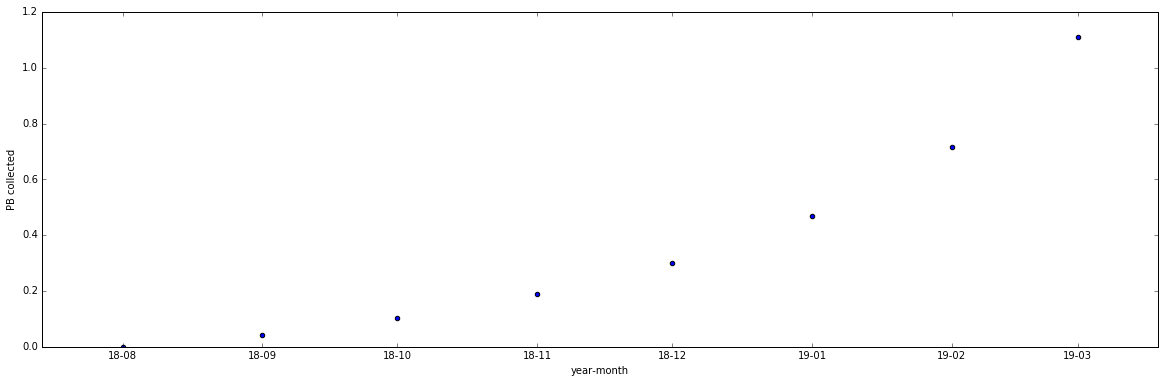

In [17]:
fig, axis = plt.subplots()
axis.scatter(plot_dates, proposed_cumulative_data_volume)
axis.set_xlabel("year-month")
axis.set_ylabel("PB collected")
axis.set_ylim(ymin=0)
axis.xaxis.set_major_formatter(month_format)

Now redo calculation without fringe stopping but with 4096 channels

In [18]:
# This is the max number of channels that Jack can do 'easily'
n_channels = 4096
corr_chan_width = (250 * units.MHz) / n_channels
# Since we will integrate longer after fringe stopping, there's no need to integrate more here
corr_integration_time = 10. * units.s
# no fringe stopping, so use same integration time
corr_post_fringe_stop_int_time = corr_integration_time

channels_to_keep = n_channels * 3/4
obs_hrs_per_day=(12 * units.hour / units.day)
days_per_month=(30 * units.day)

In [19]:
no_fs_decorrelations_90 = spec_calcs.decorrelations(baseline=max_baseline_m,
                                           corr_FoV=Angle(90., units.degree),
                                           n_channels=n_channels, chan_width=corr_chan_width,
                                           integration_time=corr_integration_time,
                                           fringe_stop_int_time=corr_post_fringe_stop_int_time,
                                           verbose=True)

Decorrelation fraction due to integration time on the longest baseline
[ 0.10209862  0.19088119  0.22639412  0.22639412  0.23083324  0.23083324
  0.23083324  0.23083324]
Longest E-W baseline with less than 10.0% decorrelation due to integration time
164.44890392341333 m
Decorrelation due to channel width for a 90.0 degree correlator FoV for the longest baseline
[ 0.03418299  0.06390733  0.07579707  0.07579707  0.07728328  0.07728328
  0.07728328  0.07728328]
Longest baseline for a 90.0 degree correlator FoV with less than 10.0% decorrelation due to channel
width
491.17996318720003 m
Correlator FoV with less than 10.0% decorrelation due to channel width for the longest baseline
['90d00m00s' '90d00m00s' '90d00m00s' '90d00m00s' '90d00m00s' '90d00m00s'
 '90d00m00s' '90d00m00s']
Decorrelation due to time integrating after fringe stopping for a 90.0 degree correlator FoV for the
longest baseline
[ 0.05215871  0.0975147   0.11565705  0.11565705  0.11792484  0.11792484
  0.11792484  0.11792484

In [20]:
no_fs_decorrelations_10 = spec_calcs.decorrelations(baseline=max_baseline_m,
                                           corr_FoV=Angle(10., units.degree),
                                           n_channels=n_channels, chan_width=corr_chan_width,
                                           integration_time=corr_integration_time,
                                           fringe_stop_int_time=corr_post_fringe_stop_int_time,
                                           verbose=True)

Decorrelation fraction due to integration time on the longest baseline
[ 0.10209862  0.19088119  0.22639412  0.22639412  0.23083324  0.23083324
  0.23083324  0.23083324]
Longest E-W baseline with less than 10.0% decorrelation due to integration time
164.44890392341333 m
Decorrelation due to channel width for a 10.0 degree correlator FoV for the longest baseline
[ 0.00593581  0.01109739  0.01316202  0.01316202  0.0134201   0.0134201
  0.0134201   0.0134201 ]
Longest baseline for a 10.0 degree correlator FoV with less than 10.0% decorrelation due to channel
width
2828.5926739140245 m
Correlator FoV with less than 10.0% decorrelation due to channel width for the longest baseline
['90d00m00s' '90d00m00s' '90d00m00s' '90d00m00s' '90d00m00s' '90d00m00s'
 '90d00m00s' '90d00m00s']
Decorrelation due to time integrating after fringe stopping for a 10.0 degree correlator FoV for the
longest baseline
[ 0.00905726  0.01693325  0.02008364  0.02008364  0.02047743  0.02047743
  0.02047743  0.02047743]

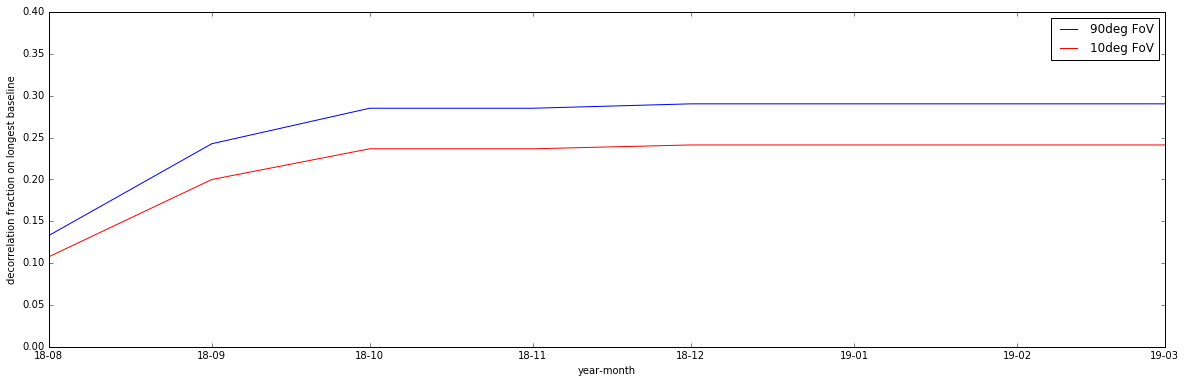

In [21]:
no_fs_total_decorr_90 = no_fs_decorrelations_90['pre_fs_total_decorr']
no_fs_total_decorr_10 = no_fs_decorrelations_10['pre_fs_total_decorr']

fig, axis = plt.subplots()
axis.plot(plot_dates, no_fs_total_decorr_90, label='90deg FoV')
axis.plot(plot_dates, no_fs_total_decorr_10, color='r', label='10deg FoV')
axis.set_xlabel("year-month")
axis.set_ylabel("decorrelation fraction on longest baseline")
axis.legend(loc=0)
axis.set_ylim(ymin=0, ymax=.4)
axis.xaxis.set_major_formatter(month_format)

In [22]:
rates = spec_calcs.data_rates(integration_time=corr_integration_time,
                              fringe_stop_int_time=corr_post_fringe_stop_int_time,
                              n_antennas=n_ants, n_channels=channels_to_keep)
print('Naive (correlator internal):')
print('data rate: ', rates[0].to(units.Gbyte/units.s))
print('channel width: ', corr_chan_width.to(units.kHz))
print('integration time: ', corr_integration_time)
print('')
print('post fringe stopping:')
print('data rate: ', rates[1].to(units.Gbyte/units.s))
month_data_vol = (rates[1].to(units.Pbyte / units.hour) * obs_hrs_per_day * days_per_month)
print('data volume per month: ', month_data_vol)
no_fs_cumulative_data_volume = np.cumsum(month_data_vol)
print('cumulative data volume per month: ', no_fs_cumulative_data_volume)
print('channel width: ', corr_chan_width.to(units.kHz))
print('integration time: ', corr_post_fringe_stop_int_time)

Naive (correlator internal):
data rate:  [ 0.00070779  0.0324993   0.04748083  0.06529352  0.08593736  0.13113754
  0.18856673  0.30623662] Gbyte / s
channel width:  61.03515625 kHz
integration time:  10.0 s

post fringe stopping:
data rate:  [ 0.00070779  0.0324993   0.04748083  0.06529352  0.08593736  0.13113754
  0.18856673  0.30623662] Gbyte / s
data volume per month:  [ 0.00091729  0.0421191   0.06153516  0.0846204   0.11137481  0.16995425
  0.24438249  0.39688266] Pbyte
cumulative data volume per month:  [  9.17294285e-04   4.30363902e-02   1.04571548e-01   1.89191946e-01
   3.00566761e-01   4.70521007e-01   7.14903493e-01   1.11178615e+00] Pbyte
channel width:  61.03515625 kHz
integration time:  10.0 s


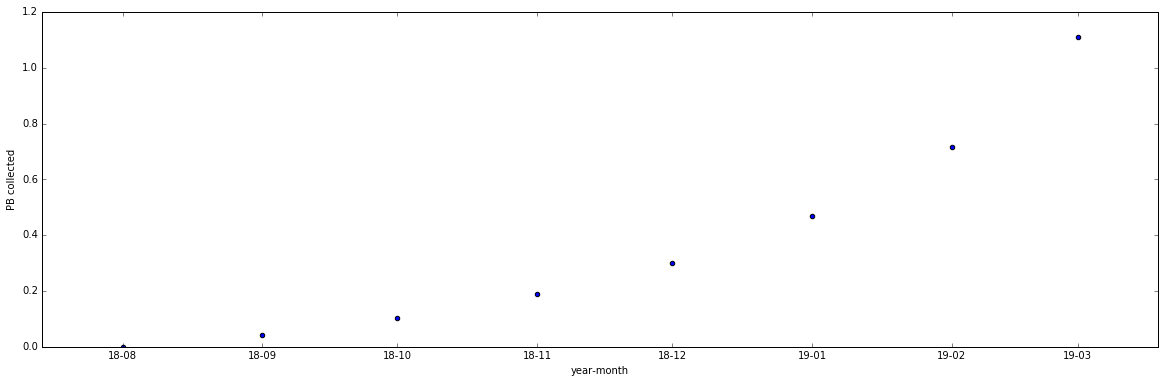

In [23]:
fig, axis = plt.subplots()
axis.scatter(plot_dates, no_fs_cumulative_data_volume)
axis.set_xlabel("year-month")
axis.set_ylabel("PB collected")
axis.set_ylim(ymin=0)
axis.xaxis.set_major_formatter(month_format)

Now redo calculation without fringe stopping but with 2048 channels

In [24]:
# This is the max number of channels that Jack can do 'easily'
n_channels = 2048
corr_chan_width = (250 * units.MHz) / n_channels
# Since we will integrate longer after fringe stopping, there's no need to integrate more here
corr_integration_time = 10. * units.s
# no fringe stopping, so use same integration time
corr_post_fringe_stop_int_time = corr_integration_time

channels_to_keep = n_channels * 3/4
obs_hrs_per_day=(12 * units.hour / units.day)
days_per_month=(30 * units.day)

In [25]:
current_decorrelations_90 = spec_calcs.decorrelations(baseline=max_baseline_m,
                                           corr_FoV=Angle(90., units.degree),
                                           n_channels=n_channels, chan_width=corr_chan_width,
                                           integration_time=corr_integration_time,
                                           fringe_stop_int_time=corr_post_fringe_stop_int_time,
                                           verbose=True)

Decorrelation fraction due to integration time on the longest baseline
[ 0.10209862  0.19088119  0.22639412  0.22639412  0.23083324  0.23083324
  0.23083324  0.23083324]
Longest E-W baseline with less than 10.0% decorrelation due to integration time
164.44890392341333 m
Decorrelation due to channel width for a 90.0 degree correlator FoV for the longest baseline
[ 0.06836598  0.12781466  0.15159413  0.15159413  0.15456657  0.15456657
  0.15456657  0.15456657]
Longest baseline for a 90.0 degree correlator FoV with less than 10.0% decorrelation due to channel
width
245.58998159360002 m
Correlator FoV with less than 10.0% decorrelation due to channel width for the longest baseline
['90d00m00s' '51d28m45.3688s' '41d16m25.1525s' '41d16m25.1525s'
 '40d18m48.8666s' '40d18m48.8666s' '40d18m48.8666s' '40d18m48.8666s']
Decorrelation due to time integrating after fringe stopping for a 90.0 degree correlator FoV for the
longest baseline
[ 0.05215871  0.0975147   0.11565705  0.11565705  0.11792484  

In [26]:
current_decorrelations_10 = spec_calcs.decorrelations(baseline=max_baseline_m,
                                           corr_FoV=Angle(10., units.degree),
                                           n_channels=n_channels, chan_width=corr_chan_width,
                                           integration_time=corr_integration_time,
                                           fringe_stop_int_time=corr_post_fringe_stop_int_time,
                                           verbose=True)

Decorrelation fraction due to integration time on the longest baseline
[ 0.10209862  0.19088119  0.22639412  0.22639412  0.23083324  0.23083324
  0.23083324  0.23083324]
Longest E-W baseline with less than 10.0% decorrelation due to integration time
164.44890392341333 m
Decorrelation due to channel width for a 10.0 degree correlator FoV for the longest baseline
[ 0.01187163  0.02219478  0.02632404  0.02632404  0.0268402   0.0268402
  0.0268402   0.0268402 ]
Longest baseline for a 10.0 degree correlator FoV with less than 10.0% decorrelation due to channel
width
1414.2963369570123 m
Correlator FoV with less than 10.0% decorrelation due to channel width for the longest baseline
['90d00m00s' '51d28m45.3688s' '41d16m25.1525s' '41d16m25.1525s'
 '40d18m48.8666s' '40d18m48.8666s' '40d18m48.8666s' '40d18m48.8666s']
Decorrelation due to time integrating after fringe stopping for a 10.0 degree correlator FoV for the
longest baseline
[ 0.00905726  0.01693325  0.02008364  0.02008364  0.02047743  0

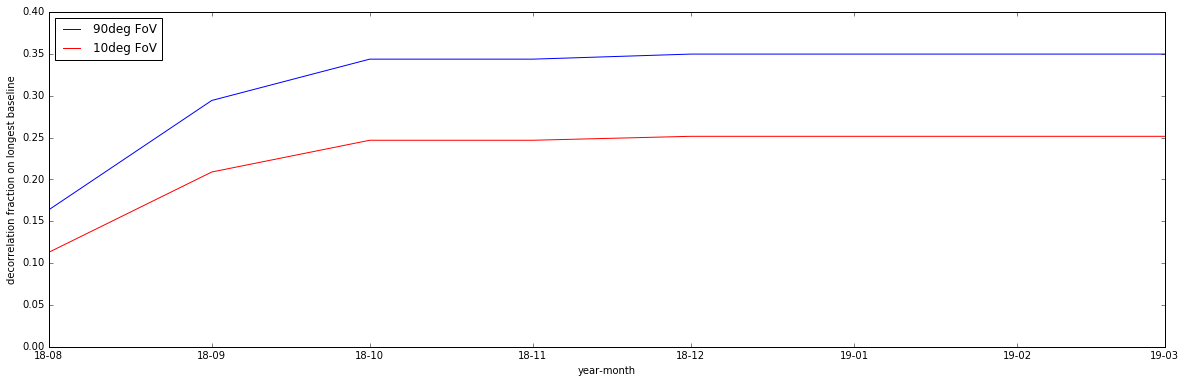

In [27]:
current_total_decorr_90 = current_decorrelations_90['pre_fs_total_decorr']
current_total_decorr_10 = current_decorrelations_10['pre_fs_total_decorr']

fig, axis = plt.subplots()
axis.plot(plot_dates, current_total_decorr_90, label='90deg FoV')
axis.plot(plot_dates, current_total_decorr_10, color='r', label='10deg FoV')
axis.set_xlabel("year-month")
axis.set_ylabel("decorrelation fraction on longest baseline")
axis.legend(loc=0)
axis.set_ylim(ymin=0, ymax=.4)
axis.xaxis.set_major_formatter(month_format)

In [28]:
rates = spec_calcs.data_rates(integration_time=corr_integration_time,
                              fringe_stop_int_time=corr_post_fringe_stop_int_time,
                              n_antennas=n_ants, n_channels=channels_to_keep)
print('Naive (correlator internal):')
print('data rate: ', rates[0].to(units.Gbyte/units.s))
print('channel width: ', corr_chan_width.to(units.kHz))
print('integration time: ', corr_integration_time)
print('')
print('post fringe stopping:')
print('data rate: ', rates[1].to(units.Gbyte/units.s))
month_data_vol = (rates[1].to(units.Pbyte / units.hour) * obs_hrs_per_day * days_per_month)
print('data volume per month: ', month_data_vol)
current_cumulative_data_volume = np.cumsum(month_data_vol)
print('cumulative data volume per month: ', current_cumulative_data_volume)
print('channel width: ', corr_chan_width.to(units.kHz))
print('integration time: ', corr_post_fringe_stop_int_time)

Naive (correlator internal):
data rate:  [ 0.00035389  0.01624965  0.02374042  0.03264676  0.04296868  0.06556877
  0.09428337  0.15311831] Gbyte / s
channel width:  122.0703125 kHz
integration time:  10.0 s

post fringe stopping:
data rate:  [ 0.00035389  0.01624965  0.02374042  0.03264676  0.04296868  0.06556877
  0.09428337  0.15311831] Gbyte / s
data volume per month:  [ 0.00045865  0.02105955  0.03076758  0.0423102   0.05568741  0.08497712
  0.12219124  0.19844133] Pbyte
cumulative data volume per month:  [  4.58647142e-04   2.15181951e-02   5.22857742e-02   9.45959731e-02
   1.50283380e-01   2.35260504e-01   3.57451747e-01   5.55893077e-01] Pbyte
channel width:  122.0703125 kHz
integration time:  10.0 s


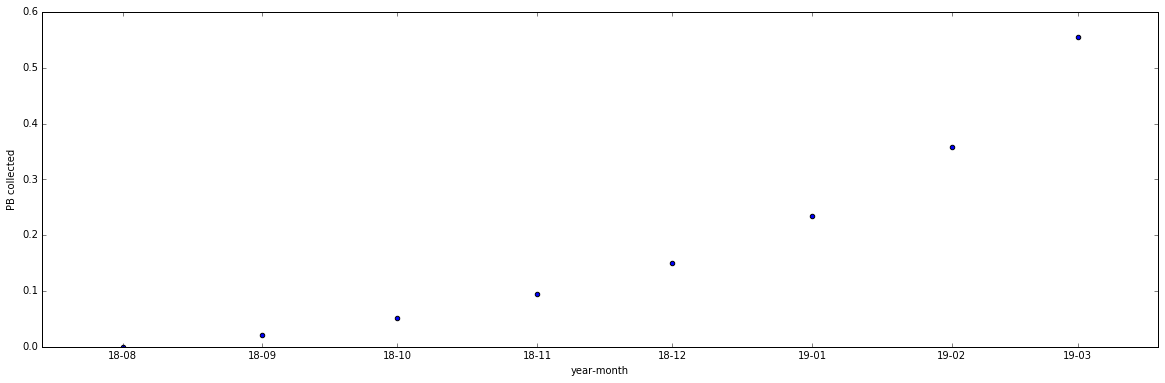

In [29]:
fig, axis = plt.subplots()
axis.scatter(plot_dates, current_cumulative_data_volume)
axis.set_xlabel("year-month")
axis.set_ylabel("PB collected")
axis.set_ylim(ymin=0)
axis.xaxis.set_major_formatter(month_format)

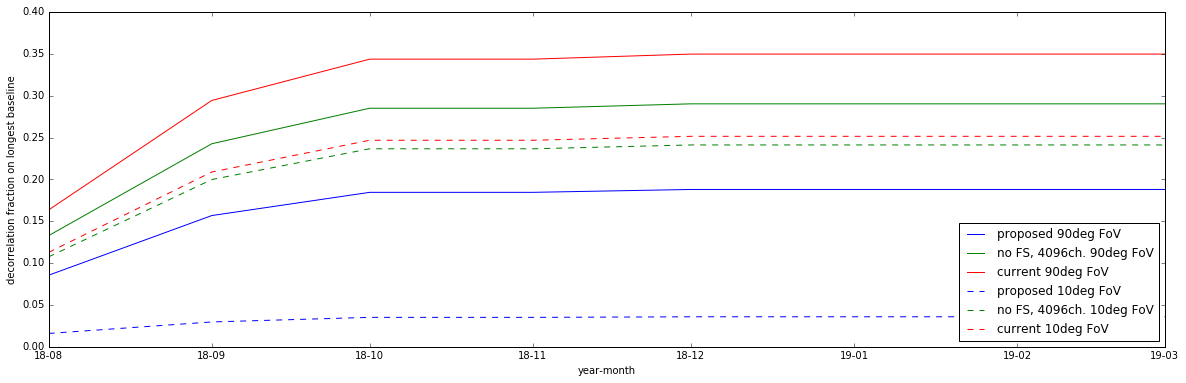

In [30]:
fig, axis = plt.subplots()
axis.plot(plot_dates, proposed_total_decorr_90, color='b', label='proposed 90deg FoV')
axis.plot(plot_dates, no_fs_total_decorr_90, color='g', label='no FS, 4096ch. 90deg FoV')
axis.plot(plot_dates, current_total_decorr_90, color='r', label='current 90deg FoV')
axis.plot(plot_dates, proposed_total_decorr_10, color='b', label='proposed 10deg FoV', linestyle='--')
axis.plot(plot_dates, no_fs_total_decorr_10, color='g', label='no FS, 4096ch. 10deg FoV', linestyle='--')
axis.plot(plot_dates, current_total_decorr_10, color='r', label='current 10deg FoV', linestyle='--')
axis.set_xlabel("year-month")
axis.set_ylabel("decorrelation fraction on longest baseline")
axis.legend(loc=0)
axis.set_ylim(ymin=0, ymax=.4)
axis.xaxis.set_major_formatter(month_format)

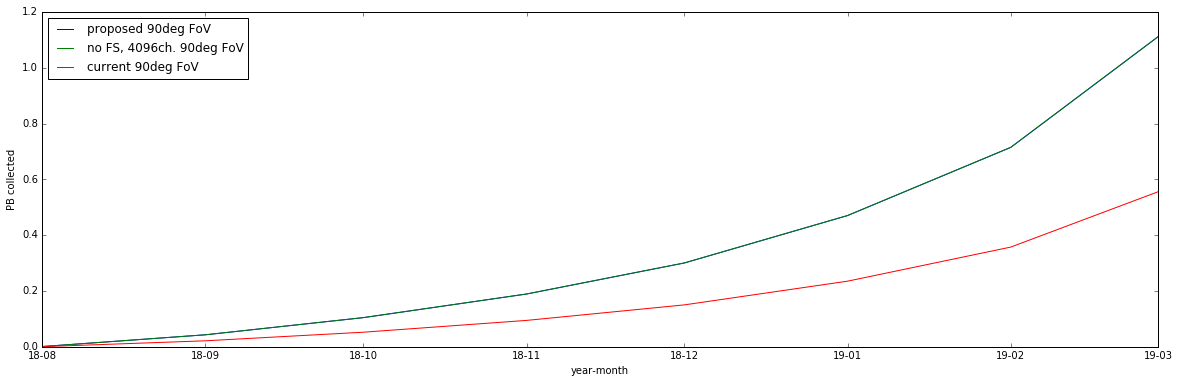

In [31]:
fig, axis = plt.subplots()
axis.plot(plot_dates, proposed_cumulative_data_volume, color='b', label='proposed 90deg FoV')
axis.plot(plot_dates, no_fs_cumulative_data_volume, color='g', label='no FS, 4096ch. 90deg FoV')
axis.plot(plot_dates, current_cumulative_data_volume, color='r', label='current 90deg FoV')
axis.set_xlabel("year-month")
axis.set_ylabel("PB collected")
axis.legend(loc=0)
axis.set_ylim(ymin=0)
axis.xaxis.set_major_formatter(month_format)